In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('flights.csv')

C:\Users\ashok\AppData\Local\Temp\ipykernel_5376\3476983621.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flights.csv')


In [3]:
df.head(2).append(df.tail(2))

C:\Users\ashok\AppData\Local\Temp\ipykernel_5376\1191156126.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head(2).append(df.tail(2))


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [5]:
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH','DAY']])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 32 columns):
 #   Column               Dtype         
---  ------               -----         
 0   YEAR                 int64         
 1   MONTH                int64         
 2   DAY                  int64         
 3   DAY_OF_WEEK          int64         
 4   AIRLINE              object        
 5   FLIGHT_NUMBER        int64         
 6   TAIL_NUMBER          object        
 7   ORIGIN_AIRPORT       object        
 8   DESTINATION_AIRPORT  object        
 9   SCHEDULED_DEPARTURE  int64         
 10  DEPARTURE_TIME       float64       
 11  DEPARTURE_DELAY      float64       
 12  TAXI_OUT             float64       
 13  WHEELS_OFF           float64       
 14  SCHEDULED_TIME       float64       
 15  ELAPSED_TIME         float64       
 16  AIR_TIME             float64       
 17  DISTANCE             int64         
 18  WHEELS_ON            float64       
 19  TAXI_IN              

In [7]:
cols = df.columns.tolist()

In [8]:
cols = cols[-1:] + cols[:-1]

In [9]:
df = df[cols]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 32 columns):
 #   Column               Dtype         
---  ------               -----         
 0   DATE                 datetime64[ns]
 1   YEAR                 int64         
 2   MONTH                int64         
 3   DAY                  int64         
 4   DAY_OF_WEEK          int64         
 5   AIRLINE              object        
 6   FLIGHT_NUMBER        int64         
 7   TAIL_NUMBER          object        
 8   ORIGIN_AIRPORT       object        
 9   DESTINATION_AIRPORT  object        
 10  SCHEDULED_DEPARTURE  int64         
 11  DEPARTURE_TIME       float64       
 12  DEPARTURE_DELAY      float64       
 13  TAXI_OUT             float64       
 14  WHEELS_OFF           float64       
 15  SCHEDULED_TIME       float64       
 16  ELAPSED_TIME         float64       
 17  AIR_TIME             float64       
 18  DISTANCE             int64         
 19  WHEELS_ON            

In [11]:
def checkMissing(data,perc=0):
    missing = [(i, data[i].isna().mean()*100) for i in data]
    missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
    missing = missing[missing.percentage > perc]
    print(missing.sort_values("percentage", ascending=False).reset_index(drop=True))
print("Proportion of missing data in columns")
checkMissing(df)

Proportion of missing data in columns
            column_name  percentage
0   CANCELLATION_REASON   98.455357
1         WEATHER_DELAY   81.724960
2   LATE_AIRCRAFT_DELAY   81.724960
3         AIRLINE_DELAY   81.724960
4        SECURITY_DELAY   81.724960
5      AIR_SYSTEM_DELAY   81.724960
6          ELAPSED_TIME    1.805629
7              AIR_TIME    1.805629
8         ARRIVAL_DELAY    1.805629
9          ARRIVAL_TIME    1.589822
10              TAXI_IN    1.589822
11            WHEELS_ON    1.589822
12           WHEELS_OFF    1.530259
13             TAXI_OUT    1.530259
14       DEPARTURE_TIME    1.480526
15      DEPARTURE_DELAY    1.480526
16          TAIL_NUMBER    0.252978
17       SCHEDULED_TIME    0.000103


In [12]:
df['LATE_AIRCRAFT_DELAY']=df['LATE_AIRCRAFT_DELAY'].fillna(0)
df['WEATHER_DELAY']=df['WEATHER_DELAY'].fillna(0)
df['AIRLINE_DELAY']=df['AIRLINE_DELAY'].fillna(0)
df['SECURITY_DELAY']=df['SECURITY_DELAY'].fillna(0)
df['AIR_SYSTEM_DELAY']=df['AIR_SYSTEM_DELAY'].fillna(0)

In [13]:
import datetime
import numpy as np

In [14]:
def format_time(x):
    if pd.isnull(x):
        return np.nan
    else:
        if x == 2400: x = 0
        x = "{0:04d}".format(int(x))
        time_ = datetime.time(int(x[0:2]), int(x[2:4]))
        return time_

In [15]:
df.head(2).append(df.tail(2))

C:\Users\ashok\AppData\Local\Temp\ipykernel_5376\1191156126.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head(2).append(df.tail(2))


,DATE,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-01,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,408.0,-22.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
1,2015-01-01,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,741.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819077,2015-12-31,2015,12,31,4,B6,333,N527JB,MCO,SJU,...,330.0,-10.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819078,2015-12-31,2015,12,31,4,B6,839,N534JB,JFK,BQN,...,442.0,2.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0


In [16]:
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(format_time)
df['SCHEDULED_DEPARTURE'] = df['SCHEDULED_DEPARTURE'].apply(format_time)

df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(format_time) 
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(format_time)

df['WHEELS_OFF'] = df['WHEELS_OFF'].apply(format_time)
df['WHEELS_ON'] = df['WHEELS_ON'].apply(format_time)

In [17]:
def time_difference(actual,plan):
    actual_time = pd.to_timedelta(actual.astype(str)) 
    plan_time = pd.to_timedelta(plan.astype(str))
    return actual_time.sub(plan_time).dt.total_seconds().div(60)
df['WHEELS_OFF_elapse'] =  time_difference(df['WHEELS_OFF'],df['DEPARTURE_TIME'])
df['WHEELS_ON_elapse'] =  time_difference(df['ARRIVAL_TIME'] ,df['WHEELS_ON'])
df=df[df['WHEELS_OFF_elapse']>0]
df=df[df['WHEELS_ON_elapse']>0]

In [18]:
df.head(2).append(df.tail(2))

C:\Users\ashok\AppData\Local\Temp\ipykernel_5376\1191156126.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head(2).append(df.tail(2))


,DATE,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse
1,2015-01-01,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,0,0,NaN,0.0,0.0,0.0,0.0,0.0,12.0,4.0
2,2015-01-01,2015,1,1,4,US,840,N171US,SFO,CLT,...,0,0,NaN,0.0,0.0,0.0,0.0,0.0,16.0,11.0
5819073,2015-12-31,2015,12,31,4,B6,66,N655JB,ABQ,JFK,...,0,0,NaN,0.0,0.0,0.0,0.0,0.0,9.0,15.0
5819078,2015-12-31,2015,12,31,4,B6,839,N534JB,JFK,BQN,...,0,0,NaN,0.0,0.0,0.0,0.0,0.0,14.0,5.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5694485 entries, 1 to 5819078
Data columns (total 34 columns):
 #   Column               Dtype         
---  ------               -----         
 0   DATE                 datetime64[ns]
 1   YEAR                 int64         
 2   MONTH                int64         
 3   DAY                  int64         
 4   DAY_OF_WEEK          int64         
 5   AIRLINE              object        
 6   FLIGHT_NUMBER        int64         
 7   TAIL_NUMBER          object        
 8   ORIGIN_AIRPORT       object        
 9   DESTINATION_AIRPORT  object        
 10  SCHEDULED_DEPARTURE  object        
 11  DEPARTURE_TIME       object        
 12  DEPARTURE_DELAY      float64       
 13  TAXI_OUT             float64       
 14  WHEELS_OFF           object        
 15  SCHEDULED_TIME       float64       
 16  ELAPSED_TIME         float64       
 17  AIR_TIME             float64       
 18  DISTANCE             int64         
 19  WHEELS_ON            

In [20]:
df.drop(['CANCELLATION_REASON',
         'CANCELLED',
         'FLIGHT_NUMBER',
         'SCHEDULED_DEPARTURE',
         'DEPARTURE_TIME',
         'SCHEDULED_ARRIVAL',
         'ARRIVAL_TIME',
         'WHEELS_ON',
         'WHEELS_OFF'],axis = 1, inplace = True)

In [21]:
df.isna().sum()

DATE                       0
YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
TAIL_NUMBER                0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
DEPARTURE_DELAY            0
TAXI_OUT                   0
SCHEDULED_TIME             0
ELAPSED_TIME           12392
AIR_TIME               12392
DISTANCE                   0
TAXI_IN                    0
ARRIVAL_DELAY          12392
DIVERTED                   0
AIR_SYSTEM_DELAY           0
SECURITY_DELAY             0
AIRLINE_DELAY              0
LATE_AIRCRAFT_DELAY        0
WEATHER_DELAY              0
WHEELS_OFF_elapse          0
WHEELS_ON_elapse           0
dtype: int64

In [22]:
df = df.dropna()

In [23]:
df.isna().sum()

DATE                   0
YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
DEPARTURE_DELAY        0
TAXI_OUT               0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
TAXI_IN                0
ARRIVAL_DELAY          0
DIVERTED               0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
WHEELS_OFF_elapse      0
WHEELS_ON_elapse       0
dtype: int64

In [24]:
df.head(2).append(df.tail(2))

C:\Users\ashok\AppData\Local\Temp\ipykernel_5376\1191156126.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head(2).append(df.tail(2))


,DATE,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,...,TAXI_IN,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse
1,2015-01-01,2015,1,1,4,AA,N3KUAA,LAX,PBI,-8.0,...,4.0,-9.0,0,0.0,0.0,0.0,0.0,0.0,12.0,4.0
2,2015-01-01,2015,1,1,4,US,N171US,SFO,CLT,-2.0,...,11.0,5.0,0,0.0,0.0,0.0,0.0,0.0,16.0,11.0
5819073,2015-12-31,2015,12,31,4,B6,N655JB,ABQ,JFK,16.0,...,15.0,3.0,0,0.0,0.0,0.0,0.0,0.0,9.0,15.0
5819078,2015-12-31,2015,12,31,4,B6,N534JB,JFK,BQN,15.0,...,5.0,2.0,0,0.0,0.0,0.0,0.0,0.0,14.0,5.0


In [25]:
df.AIRLINE.unique()

array(['AA', 'US', 'AS', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'F9',
       'WN', 'MQ', 'VX'], dtype=object)

In [26]:
df = df[df.AIRLINE!='US']

In [27]:
df.AIRLINE.unique()

array(['AA', 'AS', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'F9', 'WN',
       'MQ', 'VX'], dtype=object)

In [28]:
df['AIRLINE'].replace({
    'AA':'American Airlines',
    'AS':'Alaska Airlines',
    'DL':'Delta Airlines',
    'NK':'Spirit Airlines',
    'UA':'United Airlines',
    'HA':'Hawaiian Airlines',
    'B6':'JetBlue Airways',
    'OO':'SkyWest Airlines',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'WN':'Southwest Airlines',
    'MQ':'Envoy Air',
    'VX':'Virgin America'}, inplace=True)

In [29]:
df.AIRLINE.nunique()

13

In [30]:
df.AIRLINE.value_counts()

Southwest Airlines    1237604
Delta Airlines         866218
American Airlines      707404
SkyWest Airlines       575194
ExpressJet             553805
United Airlines        503693
Envoy Air              278074
JetBlue Airways        258559
Alaska Airlines        169707
Spirit Airlines        113668
Frontier Airlines       88498
Hawaiian Airlines       75953
Virgin America          60895
Name: AIRLINE, dtype: int64

In [31]:
df.DESTINATION_AIRPORT.value_counts().iloc[:20]

ATL    339110
ORD    270888
DFW    228003
DEN    190026
LAX    187075
SFO    142104
IAH    140468
LAS    128445
PHX    117490
MSP    108639
SEA    107929
DTW    104757
MCO    103933
BOS     95389
EWR     95219
SLC     95064
JFK     88822
LGA     88323
BWI     81941
MDW     78305
Name: DESTINATION_AIRPORT, dtype: int64

In [32]:
top_cities = df.DESTINATION_AIRPORT.value_counts().iloc[0:1].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,ATL,339110


In [33]:
top_cities.DEST.unique()

array(['ATL'], dtype=object)

In [34]:
city_list = top_cities['DEST'].tolist()

In [35]:
boolean_series =  df.DESTINATION_AIRPORT.isin(city_list)
df =  df[boolean_series]
df.head()

,DATE,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,...,TAXI_IN,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse
9,2015-01-01,2015,1,1,4,Delta Airlines,N826DN,LAS,ATL,3.0,...,5.0,-15.0,0,0.0,0.0,0.0,0.0,0.0,12.0,5.0
10,2015-01-01,2015,1,1,4,Delta Airlines,N958DN,DEN,ATL,-6.0,...,4.0,-30.0,0,0.0,0.0,0.0,0.0,0.0,12.0,4.0
13,2015-01-01,2015,1,1,4,Delta Airlines,N3751B,SLC,ATL,-6.0,...,5.0,-22.0,0,0.0,0.0,0.0,0.0,0.0,18.0,5.0
33,2015-01-01,2015,1,1,4,Delta Airlines,N320US,SLC,ATL,-6.0,...,6.0,10.0,0,0.0,0.0,0.0,0.0,0.0,43.0,6.0
77,2015-01-01,2015,1,1,4,ExpressJet,N882AS,VPS,ATL,-6.0,...,6.0,-15.0,0,0.0,0.0,0.0,0.0,0.0,9.0,6.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339110 entries, 9 to 5819044
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 339110 non-null  datetime64[ns]
 1   YEAR                 339110 non-null  int64         
 2   MONTH                339110 non-null  int64         
 3   DAY                  339110 non-null  int64         
 4   DAY_OF_WEEK          339110 non-null  int64         
 5   AIRLINE              339110 non-null  object        
 6   TAIL_NUMBER          339110 non-null  object        
 7   ORIGIN_AIRPORT       339110 non-null  object        
 8   DESTINATION_AIRPORT  339110 non-null  object        
 9   DEPARTURE_DELAY      339110 non-null  float64       
 10  TAXI_OUT             339110 non-null  float64       
 11  SCHEDULED_TIME       339110 non-null  float64       
 12  ELAPSED_TIME         339110 non-null  float64       
 13  AIR_TIME     

In [37]:
df.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER',],axis = 1, inplace = True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339110 entries, 9 to 5819044
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 339110 non-null  datetime64[ns]
 1   AIRLINE              339110 non-null  object        
 2   ORIGIN_AIRPORT       339110 non-null  object        
 3   DESTINATION_AIRPORT  339110 non-null  object        
 4   DEPARTURE_DELAY      339110 non-null  float64       
 5   TAXI_OUT             339110 non-null  float64       
 6   SCHEDULED_TIME       339110 non-null  float64       
 7   ELAPSED_TIME         339110 non-null  float64       
 8   AIR_TIME             339110 non-null  float64       
 9   DISTANCE             339110 non-null  int64         
 10  TAXI_IN              339110 non-null  float64       
 11  ARRIVAL_DELAY        339110 non-null  float64       
 12  DIVERTED             339110 non-null  int64         
 13  AIR_SYSTEM_DE

In [39]:
import calendar
flight_date=pd.DatetimeIndex(df['DATE'])
df['DAY'] = flight_date.day
df['MONTH'] = flight_date.month
df['MONTH_AB'] = df['MONTH'].apply(lambda x: calendar.month_abbr[x])
df['DAYOFWEEK'] = flight_date.dayofweek
df['DAYNAME'] = df['DAYOFWEEK'].apply(lambda x: calendar.day_name[x])
# 1 Weekday, 0 Weekend
daytype = []
for value in df['DAYOFWEEK']:
    if value in (0,1,2,3,4):
        daytype.append(1)
    else:
        daytype.append(0)
df['WEEKDAY'] = daytype
df.head(2)

,DATE,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,...,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
9,2015-01-01,Delta Airlines,LAS,ATL,3.0,12.0,221.0,203.0,186.0,1747,...,0.0,0.0,12.0,5.0,1,1,Jan,3,Thursday,1
10,2015-01-01,Delta Airlines,DEN,ATL,-6.0,12.0,173.0,149.0,133.0,1199,...,0.0,0.0,12.0,4.0,1,1,Jan,3,Thursday,1


In [40]:
airports = pd.read_csv('airports.csv')
airports.head(10)

,IATA_CODE,AIRPORT,CITY
0,AZA,Phoenix-Mesa Gateway Airport,NaN
1,BKG,Branson Airport,NaN
2,ABE,Lehigh Valley International Airport,Allentown
3,ABI,Abilene Regional Airport,Abilene
4,ABQ,Albuquerque International Sunport,Albuquerque
5,ABR,Aberdeen Regional Airport,Aberdeen
6,ABY,Southwest Georgia Regional Airport,Albany
7,ACK,Nantucket Memorial Airport,Nantucket
8,ACT,Waco Regional Airport,Waco
9,ACV,Arcata Airport,Arcata/Eureka


In [41]:
airports.shape

(353, 3)

In [42]:
airport_IATA_CODE = list(airports['IATA_CODE'])

In [43]:
df.ORIGIN_AIRPORT.unique()

array(['LAS', 'DEN', 'SLC', 'VPS', 'BNA', 'MCI', 'DFW', 'GSP', 'CID',
       'SFO', 'JFK', 'LGA', 'ORD', 'ATW', 'PHX', 'PNS', 'RIC', 'LAX',
       'BOS', 'OKC', 'MEM', 'TUL', 'JAN', 'OAJ', 'TTN', 'BDL', 'RDU',
       'PIA', 'PHL', 'CMH', 'HOU', 'MOB', 'MGM', 'ROC', 'MCO', 'BTR',
       'MIA', 'MDT', 'SAN', 'MSP', 'AUS', 'COS', 'DTW', 'SEA', 'EWR',
       'TPA', 'SAT', 'MLB', 'PIT', 'ABE', 'RSW', 'SNA', 'FLL', 'BHM',
       'MSY', 'AVL', 'HSV', 'CAK', 'DCA', 'ORF', 'DAB', 'PBI', 'CLE',
       'MKE', 'SHV', 'STL', 'LIT', 'CVG', 'IND', 'CLT', 'IAH', 'GSO',
       'SDF', 'CHS', 'CAE', 'BWI', 'DAL', 'JAX', 'SAV', 'STT', 'SJU',
       'ABQ', 'MDW', 'BZN', 'CHA', 'EYW', 'IAD', 'GNV', 'SGF', 'CRW',
       'ILM', 'SBN', 'ECP', 'PVD', 'BUF', 'OMA', 'TLH', 'AGS', 'EVV',
       'GPT', 'ROA', 'DHN', 'AEX', 'PHF', 'ICT', 'MSN', 'SRQ', 'XNA',
       'LEX', 'LFT', 'TRI', 'SYR', 'GRR', 'MLU', 'VLD', 'DAY', 'BQK',
       'FNT', 'FAY', 'BMI', 'CSG', 'MYR', 'CHO', 'EWN', 'HPN', 'GRK',
       'MLI', 'ASE',

In [44]:
flight_ORIGIN = df.ORIGIN_AIRPORT.unique().tolist()
flight_DEST = df.DESTINATION_AIRPORT.unique().tolist()
print("Length:")
print("Origin: "+str(len(flight_ORIGIN)))
print("Destination: "+str(len(flight_DEST)))

Length:
Origin: 168
Destination: 1


In [45]:
difference = [item for item in flight_ORIGIN if item not in airport_IATA_CODE]
print("IATA Code (Origin) that is not found from the airport data:")
print(difference)
print("There are "+str(len(difference)))

IATA Code (Origin) that is not found from the airport data:
[]
There are 0


In [46]:
difference_2 = [item for item in flight_DEST if item not in airport_IATA_CODE]
print("IATA Code (Destination) that is not found from airport data:")
print(difference_2)
print("There are "+str(len(difference_2)))

IATA Code (Destination) that is not found from airport data:
[]
There are 0


In [47]:
airport_dict = pd.Series(airports.AIRPORT.values, index=airports.IATA_CODE).to_dict()
print(airport_dict)

{'AZA': 'Phoenix-Mesa Gateway Airport', 'BKG': 'Branson Airport', 'ABE': 'Lehigh Valley International Airport', 'ABI': 'Abilene Regional Airport', 'ABQ': 'Albuquerque International Sunport', 'ABR': 'Aberdeen Regional Airport', 'ABY': 'Southwest Georgia Regional Airport', 'ACK': 'Nantucket Memorial Airport', 'ACT': 'Waco Regional Airport', 'ACV': 'Arcata Airport', 'ACY': 'Atlantic City International Airport', 'ADK': 'Adak Airport', 'ADQ': 'Kodiak Airport', 'AEX': 'Alexandria International Airport', 'AGS': 'Augusta Regional AirportÂ\xa0(Bush Field)', 'AKN': 'King Salmon Airport', 'ALB': 'Albany International Airport', 'ALO': 'Waterloo Regional Airport', 'AMA': 'Rick Husband Amarillo International Airport', 'ANC': 'Ted Stevens Anchorage International Airport', 'APN': 'Alpena County Regional Airport', 'ASE': 'Aspen-Pitkin County Airport', 'ATL': 'Hartsfield-Jackson Atlanta International Airport', 'ATW': 'Appleton International Airport', 'AUS': 'Austin-Bergstrom International Airport', 'AVL

In [48]:
df['ORIGIN_AIRPORT'].replace(airport_dict, inplace=True)
df['DESTINATION_AIRPORT'].replace(airport_dict, inplace=True)
df.head()

,DATE,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,...,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
9,2015-01-01,Delta Airlines,McCarran International Airport,Hartsfield-Jackson Atlanta International Airport,3.0,12.0,221.0,203.0,186.0,1747,...,0.0,0.0,12.0,5.0,1,1,Jan,3,Thursday,1
10,2015-01-01,Delta Airlines,Denver International Airport,Hartsfield-Jackson Atlanta International Airport,-6.0,12.0,173.0,149.0,133.0,1199,...,0.0,0.0,12.0,4.0,1,1,Jan,3,Thursday,1
13,2015-01-01,Delta Airlines,Salt Lake City International Airport,Hartsfield-Jackson Atlanta International Airport,-6.0,18.0,215.0,199.0,176.0,1590,...,0.0,0.0,18.0,5.0,1,1,Jan,3,Thursday,1
33,2015-01-01,Delta Airlines,Salt Lake City International Airport,Hartsfield-Jackson Atlanta International Airport,-6.0,43.0,215.0,231.0,182.0,1590,...,0.0,0.0,43.0,6.0,1,1,Jan,3,Thursday,1
77,2015-01-01,ExpressJet,Destin-Fort Walton Beach Airport/Eglin AFB,Hartsfield-Jackson Atlanta International Airport,-6.0,9.0,66.0,57.0,42.0,250,...,0.0,0.0,9.0,6.0,1,1,Jan,3,Thursday,1


In [49]:
status = []
for value in df['ARRIVAL_DELAY']:
    if value <= 15:
        status.append(0)
    else:
        status.append(1)
df['FLIGHT_STATUS'] = status   

In [50]:
df.head()

,DATE,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,...,WEATHER_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY,FLIGHT_STATUS
9,2015-01-01,Delta Airlines,McCarran International Airport,Hartsfield-Jackson Atlanta International Airport,3.0,12.0,221.0,203.0,186.0,1747,...,0.0,12.0,5.0,1,1,Jan,3,Thursday,1,0
10,2015-01-01,Delta Airlines,Denver International Airport,Hartsfield-Jackson Atlanta International Airport,-6.0,12.0,173.0,149.0,133.0,1199,...,0.0,12.0,4.0,1,1,Jan,3,Thursday,1,0
13,2015-01-01,Delta Airlines,Salt Lake City International Airport,Hartsfield-Jackson Atlanta International Airport,-6.0,18.0,215.0,199.0,176.0,1590,...,0.0,18.0,5.0,1,1,Jan,3,Thursday,1,0
33,2015-01-01,Delta Airlines,Salt Lake City International Airport,Hartsfield-Jackson Atlanta International Airport,-6.0,43.0,215.0,231.0,182.0,1590,...,0.0,43.0,6.0,1,1,Jan,3,Thursday,1,0
77,2015-01-01,ExpressJet,Destin-Fort Walton Beach Airport/Eglin AFB,Hartsfield-Jackson Atlanta International Airport,-6.0,9.0,66.0,57.0,42.0,250,...,0.0,9.0,6.0,1,1,Jan,3,Thursday,1,0


In [51]:
df['FLIGHT_STATUS'].unique()

array([0, 1], dtype=int64)

In [52]:
flight_category = df.select_dtypes(include=['object','category'])
flight_numerical = df.select_dtypes(exclude=['object'])

In [53]:
flight_category

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,MONTH_AB,DAYNAME
9,Delta Airlines,McCarran International Airport,Hartsfield-Jackson Atlanta International Airport,Jan,Thursday
10,Delta Airlines,Denver International Airport,Hartsfield-Jackson Atlanta International Airport,Jan,Thursday
13,Delta Airlines,Salt Lake City International Airport,Hartsfield-Jackson Atlanta International Airport,Jan,Thursday
33,Delta Airlines,Salt Lake City International Airport,Hartsfield-Jackson Atlanta International Airport,Jan,Thursday
77,ExpressJet,Destin-Fort Walton Beach Airport/Eglin AFB,Hartsfield-Jackson Atlanta International Airport,Jan,Thursday
...,...,...,...,...,...
5819007,United Airlines,San Francisco International Airport,Hartsfield-Jackson Atlanta International Airport,Dec,Thursday
5819014,Spirit Airlines,McCarran International Airport,Hartsfield-Jackson Atlanta International Airport,Dec,Thursday
5819033,Delta Airlines,Los Angeles International Airport,Hartsfield-Jackson Atlanta International Airport,Dec,Thursday
5819042,Delta Airlines,Portland International Airport,Hartsfield-Jackson Atlanta International Airport,Dec,Thursday


In [54]:
flight_category_2 = flight_category
flight_category_2

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,MONTH_AB,DAYNAME
9,Delta Airlines,McCarran International Airport,Hartsfield-Jackson Atlanta International Airport,Jan,Thursday
10,Delta Airlines,Denver International Airport,Hartsfield-Jackson Atlanta International Airport,Jan,Thursday
13,Delta Airlines,Salt Lake City International Airport,Hartsfield-Jackson Atlanta International Airport,Jan,Thursday
33,Delta Airlines,Salt Lake City International Airport,Hartsfield-Jackson Atlanta International Airport,Jan,Thursday
77,ExpressJet,Destin-Fort Walton Beach Airport/Eglin AFB,Hartsfield-Jackson Atlanta International Airport,Jan,Thursday
...,...,...,...,...,...
5819007,United Airlines,San Francisco International Airport,Hartsfield-Jackson Atlanta International Airport,Dec,Thursday
5819014,Spirit Airlines,McCarran International Airport,Hartsfield-Jackson Atlanta International Airport,Dec,Thursday
5819033,Delta Airlines,Los Angeles International Airport,Hartsfield-Jackson Atlanta International Airport,Dec,Thursday
5819042,Delta Airlines,Portland International Airport,Hartsfield-Jackson Atlanta International Airport,Dec,Thursday


In [55]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [56]:
flight_category_2['DAYNAME'] = pd.Categorical(flight_category_2['DAYNAME'],categories=cats,ordered=True)
flight_category_2 = flight_category_2.sort_values('DAYNAME')
flight_category_2

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,MONTH_AB,DAYNAME
4229368,Delta Airlines,Memphis International Airport,Hartsfield-Jackson Atlanta International Airport,Sep,Monday
1718286,Delta Airlines,Kansas City International Airport,Hartsfield-Jackson Atlanta International Airport,Apr,Monday
1718284,Delta Airlines,Ronald Reagan Washington National Airport,Hartsfield-Jackson Atlanta International Airport,Apr,Monday
1718283,Delta Airlines,George Bush Intercontinental Airport,Hartsfield-Jackson Atlanta International Airport,Apr,Monday
1718281,Delta Airlines,Miami International Airport,Hartsfield-Jackson Atlanta International Airport,Apr,Monday
...,...,...,...,...,...
1012623,ExpressJet,Fort Wayne International Airport,Hartsfield-Jackson Atlanta International Airport,Mar,Sunday
1012614,Southwest Airlines,Southwest Florida International Airport,Hartsfield-Jackson Atlanta International Airport,Mar,Sunday
1012592,Delta Airlines,Fort Lauderdale-Hollywood International Airport,Hartsfield-Jackson Atlanta International Airport,Mar,Sunday
1012233,ExpressJet,Jackson-Evers International Airport,Hartsfield-Jackson Atlanta International Airport,Mar,Sunday


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

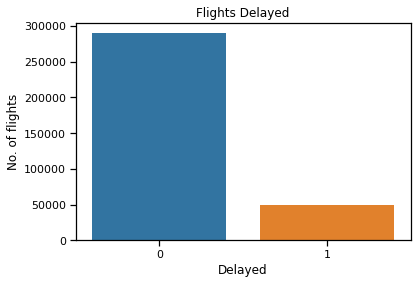

In [58]:
sns.set_context("notebook")
g=sns.countplot(x="FLIGHT_STATUS",data=df)
g.set(xlabel="Delayed")
g.set(ylabel="No. of flights")
plt.title('Flights Delayed')
plt.show()

[Text(0.5, 0, 'Number of counts')]

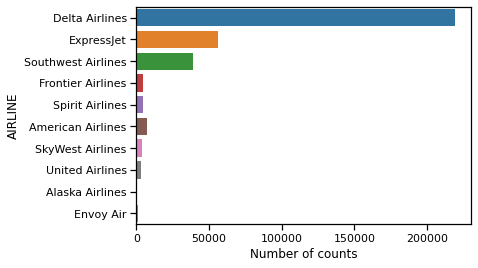

In [59]:
sns.set_context("notebook")
g=sns.countplot(y="AIRLINE",data=flight_category)
g.set(xlabel="Number of counts")

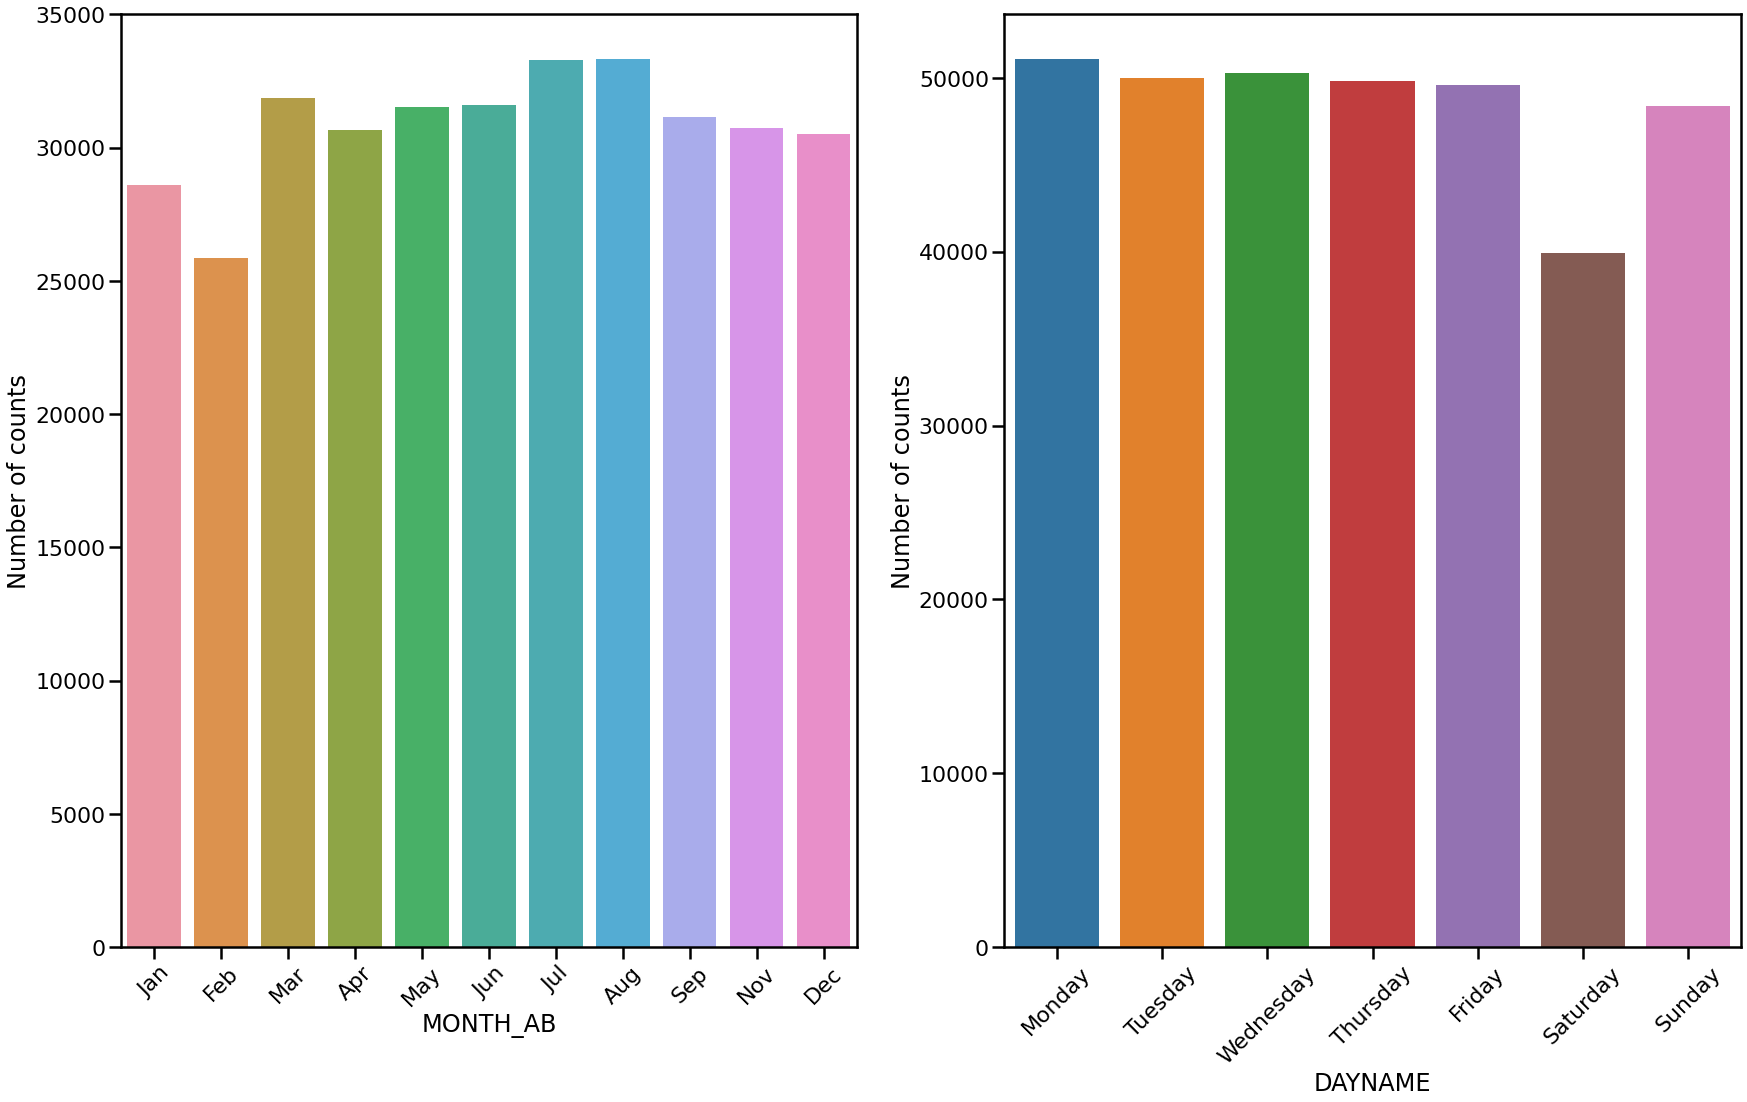

In [60]:
category = []
for i in flight_category:
    if i in ["ORIGIN_AIRPORT","DESTINATION_AIRPORT","AIRLINE","FLIGHT_STATUS"]:
        pass
    else:
        category.append(i)         
fig, ax = plt.subplots(ncols=2, figsize=(12,12))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2.5)
sns.color_palette("husl", 8)
sns.set_context("poster")
for i, feature in enumerate(list(flight_category_2[category]), 1):
    plt.subplot(len(list(category)), 2, i)
    g=sns.countplot(x=feature,data=flight_category)
    g.set(ylabel="Number of counts")
    plt.xticks(rotation=45)
plt.show()

In [61]:
Carrier = pd.get_dummies(df['AIRLINE'],prefix="AIRLINE",drop_first=False)                  
month= pd.get_dummies(df['MONTH_AB'],prefix="MONTH",drop_first=False)
day= pd.get_dummies(df['DAYNAME'],prefix="DAY",drop_first=False)
df_new=pd.concat([df,Carrier,month,day],axis=1)

In [62]:
df_new.head(2)

,DATE,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,...,MONTH_May,MONTH_Nov,MONTH_Sep,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
9,2015-01-01,Delta Airlines,McCarran International Airport,Hartsfield-Jackson Atlanta International Airport,3.0,12.0,221.0,203.0,186.0,1747,...,0,0,0,0,0,0,0,1,0,0
10,2015-01-01,Delta Airlines,Denver International Airport,Hartsfield-Jackson Atlanta International Airport,-6.0,12.0,173.0,149.0,133.0,1199,...,0,0,0,0,0,0,0,1,0,0


In [63]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339110 entries, 9 to 5819044
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   DATE                        339110 non-null  datetime64[ns]
 1   AIRLINE                     339110 non-null  object        
 2   ORIGIN_AIRPORT              339110 non-null  object        
 3   DESTINATION_AIRPORT         339110 non-null  object        
 4   DEPARTURE_DELAY             339110 non-null  float64       
 5   TAXI_OUT                    339110 non-null  float64       
 6   SCHEDULED_TIME              339110 non-null  float64       
 7   ELAPSED_TIME                339110 non-null  float64       
 8   AIR_TIME                    339110 non-null  float64       
 9   DISTANCE                    339110 non-null  int64         
 10  TAXI_IN                     339110 non-null  float64       
 11  ARRIVAL_DELAY               339110 non

In [64]:
df_new.drop(['DATE', 
             'AIRLINE',
             'ORIGIN_AIRPORT',
             'DESTINATION_AIRPORT',
             'DAYOFWEEK',
             'MONTH',
             'MONTH_AB',
             'DAY',
             'DAYNAME',
             'WEEKDAY',
             'ARRIVAL_DELAY',
             'WEATHER_DELAY',
             'AIR_SYSTEM_DELAY',
             'SECURITY_DELAY',
             'LATE_AIRCRAFT_DELAY',
             'AIRLINE_DELAY'],axis = 1, inplace = True)

In [65]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339110 entries, 9 to 5819044
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   DEPARTURE_DELAY             339110 non-null  float64
 1   TAXI_OUT                    339110 non-null  float64
 2   SCHEDULED_TIME              339110 non-null  float64
 3   ELAPSED_TIME                339110 non-null  float64
 4   AIR_TIME                    339110 non-null  float64
 5   DISTANCE                    339110 non-null  int64  
 6   TAXI_IN                     339110 non-null  float64
 7   DIVERTED                    339110 non-null  int64  
 8   WHEELS_OFF_elapse           339110 non-null  float64
 9   WHEELS_ON_elapse            339110 non-null  float64
 10  FLIGHT_STATUS               339110 non-null  int64  
 11  AIRLINE_Alaska Airlines     339110 non-null  uint8  
 12  AIRLINE_American Airlines   339110 non-null  uint8  
 13  AIRLINE_Delta

In [66]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropConstantFeatures

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    df_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    df_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)
X_train.shape, X_test.shape

((271288, 38), (67822, 38))

In [68]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')
sel.fit(X_train)

DropConstantFeatures()

In [69]:
len(sel.features_to_drop_)

1

In [70]:
sel.features_to_drop_

['DIVERTED']

In [71]:
df_new.drop(['DIVERTED'], axis = 1, inplace = True)

In [72]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
X_train.shape, X_test.shape

((271288, 37), (67822, 37))

In [73]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [74]:
corrmat

,feature1,feature2,corr
0,DISTANCE,AIR_TIME,0.983456
1,AIR_TIME,DISTANCE,0.983456
2,AIR_TIME,SCHEDULED_TIME,0.982197
3,SCHEDULED_TIME,AIR_TIME,0.982197
4,AIR_TIME,ELAPSED_TIME,0.980186
5,ELAPSED_TIME,AIR_TIME,0.980186
6,DISTANCE,SCHEDULED_TIME,0.977757
7,SCHEDULED_TIME,DISTANCE,0.977757
8,ELAPSED_TIME,SCHEDULED_TIME,0.969999
9,SCHEDULED_TIME,ELAPSED_TIME,0.969999


In [75]:
corrmat.feature1.unique()

array(['DISTANCE', 'AIR_TIME', 'SCHEDULED_TIME', 'ELAPSED_TIME'],
      dtype=object)

In [76]:
grouped_feature_ls = []
correlated_groups = []
for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]
        correlated_groups.append(correlated_block)
print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 1 correlated groups
out of 37 total features


In [77]:
for group in correlated_groups:
    print(group)
    print()

    feature1        feature2      corr
0   DISTANCE        AIR_TIME  0.983456
6   DISTANCE  SCHEDULED_TIME  0.977757
11  DISTANCE    ELAPSED_TIME  0.959939



In [78]:
group = correlated_groups[0]
group

,feature1,feature2,corr
0,DISTANCE,AIR_TIME,0.983456
6,DISTANCE,SCHEDULED_TIME,0.977757
11,DISTANCE,ELAPSED_TIME,0.959939


In [79]:
from sklearn.ensemble import RandomForestClassifier
features = list(group['feature2'].unique())+['DISTANCE']
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, random_state=100)

In [80]:
importance = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

,feature,importance
2,ELAPSED_TIME,0.452405
1,SCHEDULED_TIME,0.248141
3,DISTANCE,0.218858
0,AIR_TIME,0.080596


In [81]:
df_new.drop(['SCHEDULED_TIME','AIR_TIME'], axis = 1, inplace = True)

In [82]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat <= -0.8]
corrmat = corrmat[corrmat > -1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [83]:
grouped_feature_ls = []
correlated_groups = []
for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]
        correlated_groups.append(correlated_block)
print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 0 correlated groups
out of 37 total features


In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    df_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    df_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)
X_train.shape, X_test.shape

((271288, 35), (67822, 35))

In [85]:
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=5)
rf.fit(X_train, y_train)
rf.feature_importances_

array([6.65062217e-01, 1.31301525e-01, 1.32454453e-02, 1.24947251e-02,
       1.93552870e-02, 9.36221708e-02, 2.19782477e-02, 8.11808345e-07,
       1.22663136e-04, 2.64703584e-02, 8.07796761e-05, 5.16457971e-03,
       8.13361668e-04, 2.21398381e-04, 9.34800417e-04, 4.16549031e-03,
       1.28828213e-04, 1.45025616e-05, 6.75021115e-05, 1.37046440e-04,
       3.52801457e-04, 1.62071200e-04, 2.68968211e-05, 5.39740378e-04,
       2.40356789e-04, 5.04198267e-05, 6.79684440e-05, 1.76353925e-03,
       1.48971036e-04, 6.28264776e-05, 4.09220822e-04, 5.53290647e-05,
       6.33616455e-04, 4.00321131e-05, 6.44691360e-05])

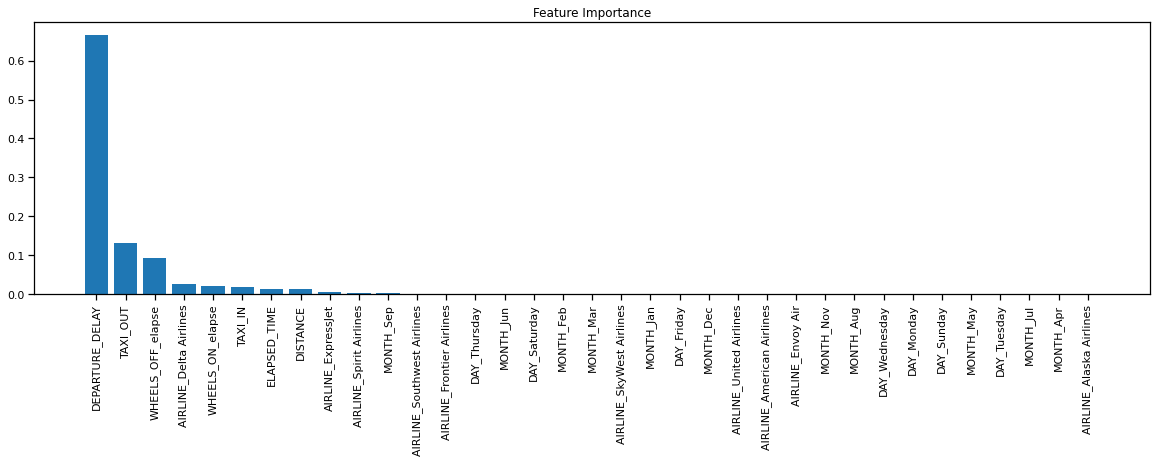

In [86]:
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1] 
names = [X_train.columns[i] for i in indices]
sns.set_context("notebook")
plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), names, rotation = 90)
plt.show()

In [118]:
features=pd.DataFrame(names)
scale = pd.DataFrame(importance[indices])
keep_features = pd.concat([features, scale],axis=1)
keep_features.columns=[0,1]
keep_features

,0,1
0,DEPARTURE_DELAY,6.650622e-01
1,TAXI_OUT,1.313015e-01
2,WHEELS_OFF_elapse,9.362217e-02
3,AIRLINE_Delta Airlines,2.647036e-02
4,WHEELS_ON_elapse,2.197825e-02
5,TAXI_IN,1.935529e-02
6,ELAPSED_TIME,1.324545e-02
7,DISTANCE,1.249473e-02
8,AIRLINE_ExpressJet,5.164580e-03
9,AIRLINE_Spirit Airlines,4.165490e-03


In [88]:
from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score, 
                             accuracy_score, 
                             confusion_matrix, 
                             classification_report, 
                             plot_confusion_matrix,
                             plot_precision_recall_curve)

In [89]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339110 entries, 9 to 5819044
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   DEPARTURE_DELAY             339110 non-null  float64
 1   TAXI_OUT                    339110 non-null  float64
 2   ELAPSED_TIME                339110 non-null  float64
 3   DISTANCE                    339110 non-null  int64  
 4   TAXI_IN                     339110 non-null  float64
 5   WHEELS_OFF_elapse           339110 non-null  float64
 6   WHEELS_ON_elapse            339110 non-null  float64
 7   FLIGHT_STATUS               339110 non-null  int64  
 8   AIRLINE_Alaska Airlines     339110 non-null  uint8  
 9   AIRLINE_American Airlines   339110 non-null  uint8  
 10  AIRLINE_Delta Airlines      339110 non-null  uint8  
 11  AIRLINE_Envoy Air           339110 non-null  uint8  
 12  AIRLINE_ExpressJet          339110 non-null  uint8  
 13  AIRLINE_Front

In [90]:
df_new["FLIGHT_STATUS"] = df_new["FLIGHT_STATUS"].astype('category')

In [91]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339110 entries, 9 to 5819044
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   DEPARTURE_DELAY             339110 non-null  float64 
 1   TAXI_OUT                    339110 non-null  float64 
 2   ELAPSED_TIME                339110 non-null  float64 
 3   DISTANCE                    339110 non-null  int64   
 4   TAXI_IN                     339110 non-null  float64 
 5   WHEELS_OFF_elapse           339110 non-null  float64 
 6   WHEELS_ON_elapse            339110 non-null  float64 
 7   FLIGHT_STATUS               339110 non-null  category
 8   AIRLINE_Alaska Airlines     339110 non-null  uint8   
 9   AIRLINE_American Airlines   339110 non-null  uint8   
 10  AIRLINE_Delta Airlines      339110 non-null  uint8   
 11  AIRLINE_Envoy Air           339110 non-null  uint8   
 12  AIRLINE_ExpressJet          339110 non-null  uint8   
 13

In [92]:
df_new.to_csv('df_new.csv',index=False)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    df_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    df_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)
X_train.shape, X_test.shape

((271288, 35), (67822, 35))

In [94]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf.predict(X_test)))

In [95]:
run_randomForests(X_train, X_test, y_train, y_test)

Test set
Roc-auc Random Forests roc-auc: 0.9704691822195304

Accuracy Random Forest test: 0.9099997051104362

Precision Random Forest test: 0.9822175732217573

Recall Random Forest test: 0.38357843137254904

F-measure Random Forest test: 0.5517038777908344

Summary Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     58030
           1       0.98      0.38      0.55      9792

    accuracy                           0.91     67822
   macro avg       0.94      0.69      0.75     67822
weighted avg       0.92      0.91      0.89     67822



In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
def run_logisticReg(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(random_state=100)
    lr.fit(X_train, y_train)
    print('Test set')
    pred = lr.predict_proba(X_test)
    print('Roc-auc Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Logistic Regression:', accuracy_score(y_test, lr.predict(X_test)))
    print()
    print('Precision Logistic Regression:', precision_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Recall Logistic Regression:', recall_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('F-measure Logistic Regression:', f1_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, lr.predict(X_test)))

In [98]:
run_logisticReg(X_train, X_test, y_train, y_test)

C:\Users\ashok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test set
Roc-auc Logistic Regression roc-auc: 0.9790076746420321

Accuracy Logistic Regression: 0.9549408746424464

Precision Logistic Regression: 0.8660073896978918

Recall Logistic Regression: 0.813827614379085

F-measure Logistic Regression: 0.8391070864483522

Summary Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     58030
           1       0.87      0.81      0.84      9792

    accuracy                           0.95     67822
   macro avg       0.92      0.90      0.91     67822
weighted avg       0.95      0.95      0.95     67822



In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
def run_DT(X_train, X_test, y_train, y_test):
    DT = DecisionTreeClassifier(random_state=100)
    DT = DT.fit(X_train,y_train)
    print('Test set')
    pred = DT.predict_proba(X_test)
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Decision Tree:', accuracy_score(y_test, DT.predict(X_test)))
    print()
    print('Precision Decision Tree:', precision_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Recall Decision Tree:', recall_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('F-measure Decision Tree:', f1_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, DT.predict(X_test)))

In [101]:
run_DT(X_train, X_test, y_train, y_test)

Test set
Roc-auc Decision Tree roc-auc: 0.9096173561905662

Accuracy Decision Tree: 0.9548671522514818

Precision Decision Tree: 0.8421266646335265

Recall Decision Tree: 0.8459967320261438

F-measure Decision Tree: 0.844057262214071

Summary Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     58030
           1       0.84      0.85      0.84      9792

    accuracy                           0.95     67822
   macro avg       0.91      0.91      0.91     67822
weighted avg       0.95      0.95      0.95     67822



In [102]:
#from sklearn import svm

In [103]:
#def run_SVM(X_train, X_test, y_train, y_test):
#    svm_class = svm.SVC(probability=True, random_state=100)
#    svm_class.fit(X_train, y_train)
#    print('Test set')
#    pred = svm_class.predict_proba(X_test)
#    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, svm_class.pred[:,1])))
#    print()
#    print('Accuracy Random Forest test:', accuracy_score(y_test, svm_class.predict(X_test)))
#    print()
#    print('Precision Random Forest test:', precision_score(y_test, svm_class.predict(X_test),pos_label=1))
#    print()
#    print('Recall Random Forest test:', recall_score(y_test, svm_class.predict(X_test),pos_label=1))
#    print()
#    print('F-measure Random Forest test:', f1_score(y_test, svm_class.predict(X_test),pos_label=1))

In [104]:
#run_SVM(X_train, X_test, y_train, y_test)

In [105]:
def run_all(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    lr = LogisticRegression(random_state=100)
    lr.fit(X_train, y_train)
    print('Test set')
    pred = lr.predict_proba(X_test)
    print('Accuracy Logistic Regression:', accuracy_score(y_test, lr.predict(X_test)))
    print()
    DT = DecisionTreeClassifier(random_state=100)
    DT = DT.fit(X_train,y_train)
    print('Test set')
    pred = DT.predict_proba(X_test)
    print('Accuracy Decision Tree:', accuracy_score(y_test, DT.predict(X_test)))
    print()

In [106]:
run_all(X_train, X_test, y_train, y_test)

Test set
Accuracy Random Forest test: 0.9099997051104362



C:\Users\ashok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test set
Accuracy Logistic Regression: 0.9549408746424464

Test set
Accuracy Decision Tree: 0.9548671522514818



In [108]:
lr = LogisticRegression(random_state=100)
lr.fit(X_train, y_train)
print('Test set')
pred = lr.predict_proba(X_test)
print('Accuracy Logistic Regression:', accuracy_score(y_test, lr.predict(X_test)))

Test set
Accuracy Logistic Regression: 0.9549408746424464


C:\Users\ashok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [111]:
df_new.head()

,DEPARTURE_DELAY,TAXI_OUT,ELAPSED_TIME,DISTANCE,TAXI_IN,WHEELS_OFF_elapse,WHEELS_ON_elapse,FLIGHT_STATUS,AIRLINE_Alaska Airlines,AIRLINE_American Airlines,...,MONTH_May,MONTH_Nov,MONTH_Sep,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
9,3.0,12.0,203.0,1747,5.0,12.0,5.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,-6.0,12.0,149.0,1199,4.0,12.0,4.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13,-6.0,18.0,199.0,1590,5.0,18.0,5.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33,-6.0,43.0,231.0,1590,6.0,43.0,6.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
77,-6.0,9.0,57.0,250,6.0,9.0,6.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [112]:
df.head()

,DATE,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,...,WEATHER_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY,FLIGHT_STATUS
9,2015-01-01,Delta Airlines,McCarran International Airport,Hartsfield-Jackson Atlanta International Airport,3.0,12.0,221.0,203.0,186.0,1747,...,0.0,12.0,5.0,1,1,Jan,3,Thursday,1,0
10,2015-01-01,Delta Airlines,Denver International Airport,Hartsfield-Jackson Atlanta International Airport,-6.0,12.0,173.0,149.0,133.0,1199,...,0.0,12.0,4.0,1,1,Jan,3,Thursday,1,0
13,2015-01-01,Delta Airlines,Salt Lake City International Airport,Hartsfield-Jackson Atlanta International Airport,-6.0,18.0,215.0,199.0,176.0,1590,...,0.0,18.0,5.0,1,1,Jan,3,Thursday,1,0
33,2015-01-01,Delta Airlines,Salt Lake City International Airport,Hartsfield-Jackson Atlanta International Airport,-6.0,43.0,215.0,231.0,182.0,1590,...,0.0,43.0,6.0,1,1,Jan,3,Thursday,1,0
77,2015-01-01,ExpressJet,Destin-Fort Walton Beach Airport/Eglin AFB,Hartsfield-Jackson Atlanta International Airport,-6.0,9.0,66.0,57.0,42.0,250,...,0.0,9.0,6.0,1,1,Jan,3,Thursday,1,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339110 entries, 9 to 5819044
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 339110 non-null  datetime64[ns]
 1   AIRLINE              339110 non-null  object        
 2   ORIGIN_AIRPORT       339110 non-null  object        
 3   DESTINATION_AIRPORT  339110 non-null  object        
 4   DEPARTURE_DELAY      339110 non-null  float64       
 5   TAXI_OUT             339110 non-null  float64       
 6   SCHEDULED_TIME       339110 non-null  float64       
 7   ELAPSED_TIME         339110 non-null  float64       
 8   AIR_TIME             339110 non-null  float64       
 9   DISTANCE             339110 non-null  int64         
 10  TAXI_IN              339110 non-null  float64       
 11  ARRIVAL_DELAY        339110 non-null  float64       
 12  DIVERTED             339110 non-null  int64         
 13  AIR_SYSTEM_DE

In [110]:
import streamlit as st

In [117]:
st.set_page_config(page_title="Crime Analysis",page_icon=":barchart:",layout='wide')